<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/Colab_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Crisp Cerebella - Colab Demo**

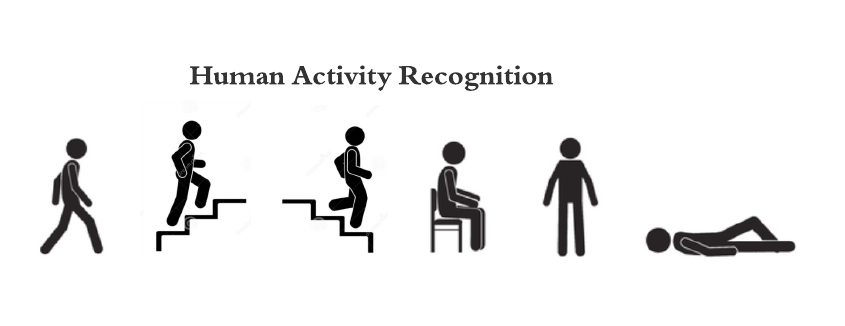

The ubiquitous capability of inertial sensors embedded in smartphones to capture and transmit data allows scientists to develop human activity recognition solutions. In recent years, scientists adopt machine-learning techniques to recognize these activities. In this report, four different machine learning models (stacked long short-term memory (LSTM) with two layers, convolutional LSTM (ConvLSTM), convolutional neural network LSTM (CNNLSTM), and transfer learning) are evaluated, to recognize human activities using sensor data from the UCI-HAR dataset (accelerometer and gyroscope data). In addition, machine-learning approaches to optimize the models' performance and achieve the highest model accuracy are suggested. The results were compared in terms of accuracy and additional evaluation classification evaluation metrics.

#Import of all necesarry functions and librarys

In order to run the code and be able to access all the needed function and models, it is necessary to incorporate the GitHub Repository in this notebook. This is done by cloning it:

In [1]:
# Clone the GitHub Repository to have all data and functions abailable
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 878, done.
remote: Counting objects: 100% (305/305), done.
remote: Compressing objects: 100% (275/275), done.
remote: Total 878 (delta 174), reused 71 (delta 29), pack-reused 573
Receiving objects: 100% (878/878), 323.03 MiB | 19.97 MiB/s, done.
Resolving deltas: 100% (475/475), done.
Checking out files: 100% (121/121), done.


In [2]:
pip install -q -U keras-tuner

     |████████████████████████████████| 96 kB 2.9 MB/s 


In [3]:
import os 
from google.colab import files
from tensorflow.keras.utils import to_categorical
import keras_tuner

To have this Notebook in organized format, we created functions for most parts of our analysis and evaluation. In order to use these function (which are stored in different .py files in the GitHub Repository), we need to import them first. This is done as follows:

In [4]:
# Import own functions and model-classes
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *
from CrispCerebella.Code.test_functions import *
from CrispCerebella.Code.data_visualization import *

#Data-Loading

To load the data we created customized functions, that can be viewed in the [data_loading.py](https://github.com/Entspannter/CrispCerebella/blob/main/Code/data_loading.py) file. 

In [5]:
# load all train
trainX, trainy = datasetloader('train', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of training Data:",trainX.shape, trainy.shape)
# load all test
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:",testX.shape, testy.shape)

Shape of training Data: (7352, 128, 9) (7352, 1)
Shape of test Data: (2947, 128, 9) (2947, 1)


#Data Visualization and Exploration

In order to create grouped training and test data we created a customized function, which can be found in the [data_visualization.py](https://github.com/Entspannter/CrispCerebella/blob/main/Code/data_visualization.py) file.

,Train,Test
Activity Labels,,
WALKING,1226,496
WALKING UPSTAIRS,1073,471
WALKING DOWNSTAIRS,986,420
SITTING,1286,491
STANDING,1374,532
LAYING,1407,537


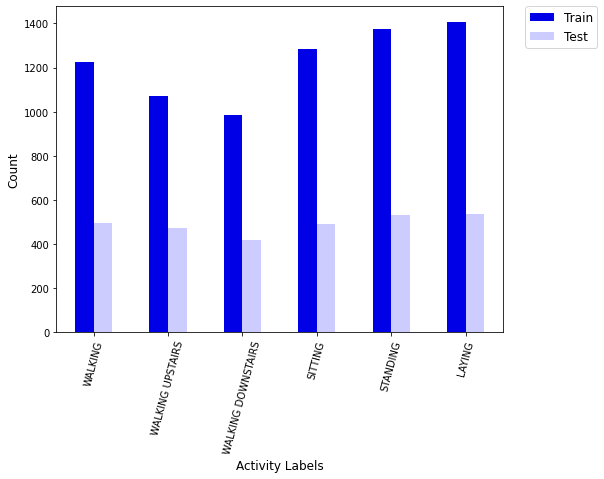

In [6]:
trainy_grouped = rows_by_class(trainy, False)

testy_grouped = rows_by_class(testy, False)

#visualize activity in both 'train' and 'test'
all_grouped_dfs = pd.concat([trainy_grouped, testy_grouped], axis=1, join='inner')
all_grouped_dfs.columns = ['Train','Test']
all_grouped_dfs['Activity Labels'] = ['WALKING', 'WALKING UPSTAIRS', 'WALKING DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
all_grouped_dfs.set_index(['Activity Labels'], inplace=True)
display(all_grouped_dfs)
ax = all_grouped_dfs.plot.bar(color = ('#0000e6', '#ccccff'), figsize=(8,6))
plt.xticks(rotation=75)
plt.ylabel("Count", fontsize=12)
plt.xlabel('Activity Labels', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)


We assigned the different activity classes to each row and analyzed the number of rows, which correspond to each activity (see Figure Activity Labels). Overall, we can see that the distribution of the test and training dataset activities is similar, which can indicate that the data split is balanced.  

Subjects in the training set: [ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
Data for subject No. 26: (392, 128, 9) (392, 1)  
  
 


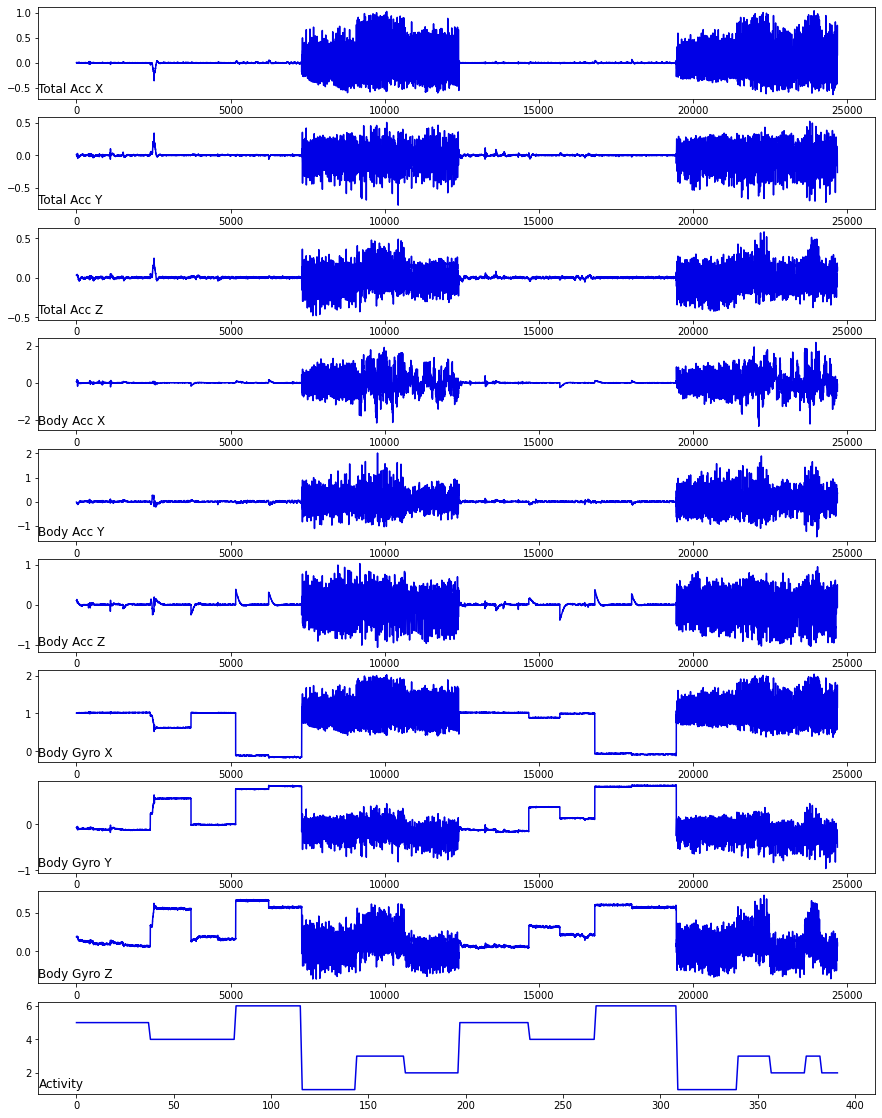

In [7]:
plt.show()
# load mapping of rows to the subjects
sub_map = dataloader('/content/CrispCerebella/Dataset/UCI HAR Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
# print which subjects from the whole dataset are in the training dataset
print("Subjects in the training set:", train_subjects)
# get the data for one subject (here for the presentation we use the subject number 16)
sub_id = train_subjects[16]
subX, suby = individual_timeseries(trainX, trainy, sub_map, sub_id)
print(f'Data for subject No. {sub_id}:', subX.shape, suby.shape, " \n  \n ")

# plot data for subject number 16
plot_subject(subX, suby)

To give an example of the used time series data, one can look at a single subject's for whom all time series variables were plotted according to the six activities. As easily observed, stationary activities differ from the dynamic activities in terms of the illustrated movement patterns.

#Loading the best trained model

All Models of this project are saved in the SavedModel format of Tensorflow (Folder structure consisting of multiple files containing the weights, hyperparameters and the model structure). These folders are stored in a .zip format in our GitHub Repository and are accasable from there.

In [8]:
# loading the Lables of the dataset
y_labels = load_labels('/content/CrispCerebella/Dataset/UCI HAR Dataset/test/y_test.txt')

In [9]:
# defining the Name of the best model (CNNLSTM model) 
# This is done, because the models are saved with the name (CNNLSTM) and the first four digits of the accuracy (91.92% -> 9192)
acc_CNNLSTM ="9192"

In [10]:
# All models are stored in zip-files, so prior to loading the model, we need to unzip the file
!unzip /content/CrispCerebella/Models/Final_Model_CNNLSTM_{acc_CNNLSTM}.zip 

Archive:  /content/CrispCerebella/Models/Final_Model_CNNLSTM_9192.zip
   creating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/
   creating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/variables/
  inflating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/variables/variables.index  
  inflating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/variables/variables.data-00000-of-00001  
   creating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/assets/
  inflating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/keras_metadata.pb  
  inflating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/saved_model.pb  


In [11]:
# load the saved CNNLSTM model and store it in the variable BestCNNLSTMModel
BestCNNLSTMModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_CNNLSTM_{acc_CNNLSTM}')

#Performance of the model 

In order to evaluate the data, it needs to be transformed and reshaped first. This is done by using again a customized function, which can be found in the [train_functions.py](https://github.com/Entspannter/CrispCerebella/blob/main/Code/train_functions.py) file.

In [12]:
# transform the data
trainX, trainy, testX, testy = transform_dataset(trainX, trainy, testX, testy)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [13]:
# definition fo the number of features contained in the dataset 
n_features =testX.shape[2]

# defining the number of steps and the length, to reshape the data 
n_steps, n_length = 4, 32

# reshaping the data by using the predefined variables
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))

During training and evaluation of the model the following loss an accuracy functions can be observed. The creation of these graphs can be found in the [train_CNNLSTM.ipynb](https://github.com/Entspannter/CrispCerebella/blob/main/Code/train_CNNLSTM.ipynb) and [train_functions.py](https://github.com/Entspannter/CrispCerebella/blob/main/Code/train_functions.py).

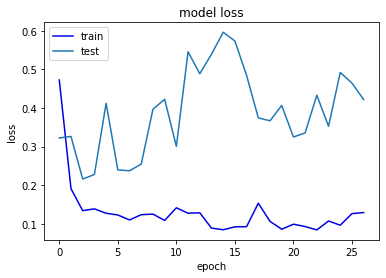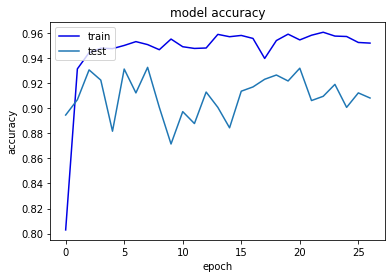


An increase of the accuracy with more epochs can be observed, as well as a decrease of the loss. Although the test loss is increasing during some epochs, which could be based on the fact, that the model's evaluation matrics was the accuracy. 



To evaluate the loaded model a function from [Keras](https://keras.io/) (model.evaluate) is used. After passing the testX and testy data the evaluate function returns the test loss and the test accuracy of the provided model.

In [14]:
# evaluate the loaded model
print("Evaluate on test data")
results = BestCNNLSTMModel.evaluate(testX, testy)
print("test loss, test acc:", results)

Evaluate on test data
93/93 [==============================] - 2s 19ms/step - loss: 0.5012 - accuracy: 0.9192
test loss, test acc: [0.5011709928512573, 0.91923987865448]


This shows the reached accuracy of 91.92% and a categorical cross entropie loss of 0.5.
Based on the fact, that the accuracy and the loss are not the only important measurments, we created a heatmap containing next to the accuracy also the precision, recall and f1-score. The used function create_heatmap can be found in the [test_functions.py](https://github.com/Entspannter/CrispCerebella/blob/main/Code/test_functions.py) file. 

It is important to mention, that prior to runing the create_heatmap command, the test data has be reloaded and reshaped again to make sure that the transformations is overwritten.

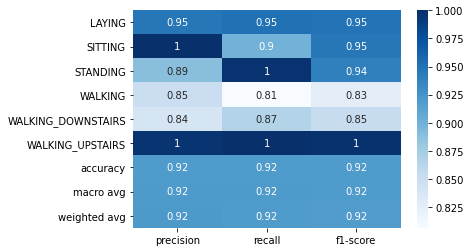

In [15]:
# reload the data to reverse the transformation
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
# definition fo the number of features contained in the dataset 
n_features =testX.shape[2]
# defining the number of steps and the length, to reshape the data 
n_steps, n_length = 4, 32
# reshaping the data by using the predefined variables
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))

# Create a heatmap for the CNNLSTM model, to show the performance
prediction, target_names = create_heatmap(BestCNNLSTMModel, testX, testy, y_labels)

As a last step a normalized Confusion Matrix is created to show the performance of the model. The used function Con_Matrix can be found in the [test_functions.py](https://github.com/Entspannter/CrispCerebella/blob/main/Code/test_functions.py) file.

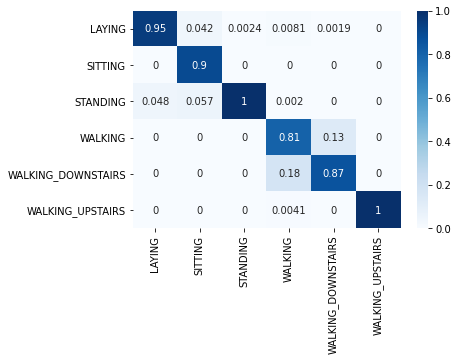

In [16]:
Con_Matrix(testy, prediction, target_names)

#Evaluation of the results

From the presented graphs and figures it can be observed, that the model predicts the activities standing and walking upstairs very good (100% correct). However walking and walking downsatirs were predicted with the lowest success rate (81% and 87% respectively). An interesting observation is, that those two acctivities are confused by the model. 

From the classification report we observe that all three metrics (presicion, recall and f1-score) are 1, which indicates, that all predicted walking upstairs observations corresponded to the actual class.

A full comparisson with the other models can be found in the [report](https://github.com/Entspannter/CrispCerebella).


# Further Resources and Code

All used fuctions and resources, as well as the report to this project can be found on GitHub in the [CrispCerebella Repository](https://github.com/Entspannter/CrispCerebella).